In [ ]:
import numpy as np
import cv2
import torch

In [ ]:
np.__version__

'1.22.4'

In [ ]:
torch.__version__

'2.0.0+cu118'

In [ ]:
cv2.__version__

'4.7.0'

In [ ]:
import torchvision

In [ ]:
train_dataset = torchvision.datasets.MNIST('.', train=True, transform=torchvision.transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root =".", train = False, transform = torchvision.transforms.ToTensor( ))

train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = 32, shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset, batch_size = 32, shuffle = False)

tensor(7)


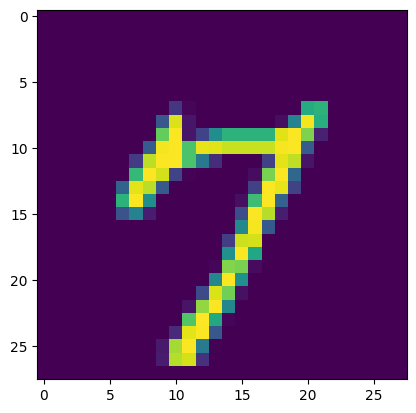

In [ ]:
import matplotlib.pyplot as plt

for x, y in train_loader:
    plt.figure()
    temp = x[0,].numpy().reshape(28, 28)
    plt.imshow(temp)
    print(y[0])
    break

In [ ]:
import torch.nn as nn

In [ ]:
class SimpleNetwork(nn.Module):
    def __init__(self):
        super(SimpleNetwork,self).__init__()
        self.linear1 = nn.Linear(28*28, 100) 
        self.linear2 = nn.Linear(100, 50) 
        self.fc = nn.Linear(50, 10)
        self.relu = nn.ReLU()

    def forward(self, image):
        a = image.view(-1, 28*28)
        a = self.relu(self.linear1(a))
        a = self.relu(self.linear2(a))
        a = self.fc(a)
        return a

In [ ]:
my_model = SimpleNetwork()

In [ ]:
optimizer = torch.optim.SGD(my_model.parameters(), lr=1e-3)

size = len(train_loader.dataset)
epoch = 1
for i in range(epoch):
    print(f"Epoch {i+1}\n-------------------------------")
    for batch, (x, y) in enumerate(train_loader):
        r = my_model.forward(x)

        loss = torch.nn.CrossEntropyLoss()(r, y)

        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(x)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

Epoch 1
-------------------------------
loss: 2.293010  [   32/60000]
loss: 2.110903  [ 3232/60000]
loss: 1.224357  [ 6432/60000]
loss: 1.240056  [ 9632/60000]
loss: 1.799472  [12832/60000]
loss: 0.910632  [16032/60000]
loss: 0.658906  [19232/60000]
loss: 0.443468  [22432/60000]
loss: 0.391475  [25632/60000]
loss: 0.308100  [28832/60000]
loss: 0.663254  [32032/60000]
loss: 0.890583  [35232/60000]
loss: 1.291512  [38432/60000]
loss: 0.303407  [41632/60000]
loss: 0.156556  [44832/60000]
loss: 1.054430  [48032/60000]
loss: 0.854497  [51232/60000]
loss: 0.298857  [54432/60000]
loss: 1.859746  [57632/60000]


In [ ]:
num_batches = len(test_loader)
size = len(test_loader.dataset)
test_loss = 0
correct = 0

with torch.no_grad():
    for batch, (x, y) in enumerate(test_loader):
        r = my_model.forward(x)
        test_loss += torch.nn.CrossEntropyLoss()(r, y).item()
        correct += (r.argmax(1) == y).type(torch.float).sum().item()
test_loss /= num_batches
correct /= size

print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

Test Error: 
 Accuracy: 76.6%, Avg loss: 1.071593 

